In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
cleanpath = os.path.abspath('ijf_ranking.txt')
file = open(cleanpath, 'r')
file_read = file.read()

In [3]:
df = pd.DataFrame(json.loads(file_read))
df.head()

,id,sum_points,place,place_prev,id_person,family_name,given_name,gender,timestamp_version,id_country,country_name,country_ioc_code,id_continent,id_weight,weight_name,score_parts
0,613_32_7,6171,1,1,613,KRPALEK,Lukas,male,v1559747179,32,Czech Republic,cze,3,7,+100,"[{'points': 2000, 'competition': {'id': '1751'..."
1,11651_13_7,5530,2,2,11651,HARASAWA,Hisayoshi,male,v1562956084,13,Japan,jpn,2,7,+100,"[{'points': 1400, 'competition': {'id': '1751'..."
2,8178_6_7,5125,3,3,8178,TUSHISHVILI,Guram,male,v1553768785,6,Georgia,geo,3,7,+100,"[{'points': 1000, 'competition': {'id': '2018'..."
3,3394_28_7,4575,4,4,3394,MEYER,Roy,male,v1573291329,28,Netherlands,ned,3,7,+100,"[{'points': 1000, 'competition': {'id': '1751'..."
4,21360_7_7,4249,5,5,21360,TASOEV,Inal,male,v1546769990,7,Russian Federation,rus,3,7,+100,"[{'points': 1000, 'competition': {'id': '1764'..."


In [4]:

df.index = df.index + 1
df = df.drop(columns = ['id','timestamp_version','score_parts'] )

In [5]:
df['country_name'].value_counts()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 1 to 1400
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sum_points        1400 non-null   int64 
 1   place             1400 non-null   int64 
 2   place_prev        1400 non-null   int64 
 3   id_person         1400 non-null   object
 4   family_name       1400 non-null   object
 5   given_name        1400 non-null   object
 6   gender            1400 non-null   object
 7   id_country        1400 non-null   object
 8   country_name      1400 non-null   object
 9   country_ioc_code  1400 non-null   object
 10  id_continent      1400 non-null   object
 11  id_weight         1400 non-null   object
 12  weight_name       1400 non-null   object
dtypes: int64(3), object(10)
memory usage: 142.3+ KB


sum_points          0
place               0
place_prev          0
id_person           0
family_name         0
given_name          0
gender              0
id_country          0
country_name        0
country_ioc_code    0
id_continent        0
id_weight           0
weight_name         0
dtype: int64

In [6]:
df_kor = df[df['country_ioc_code'] == 'kor']
df_kor = df_kor[['weight_name','place','family_name','given_name','gender','country_name']].reset_index()
del df_kor['index']
df_kor.index = df_kor.index + 1
df_kor 

,weight_name,place,family_name,given_name,gender,country_name
1,+100,10,KIM,Minjong,male,Republic of Korea
2,+100,14,KIM,Sungmin,male,Republic of Korea
3,+100,61,YOUN,Jaegu,male,Republic of Korea
4,-100,1,CHO,Guham,male,Republic of Korea
5,-100,87,WON,Jonghoon,male,Republic of Korea
6,-90,7,GWAK,Donghan,male,Republic of Korea
7,-81,34,LEE,Sungho,male,Republic of Korea
8,-81,37,LEE,Moon Jin,male,Republic of Korea
9,-81,45,LEE,Seungsu,male,Republic of Korea
10,-73,12,AN,Changrim,male,Republic of Korea


Text(0.5, 1.0, 'No.1 Ranked Judoka per Country')

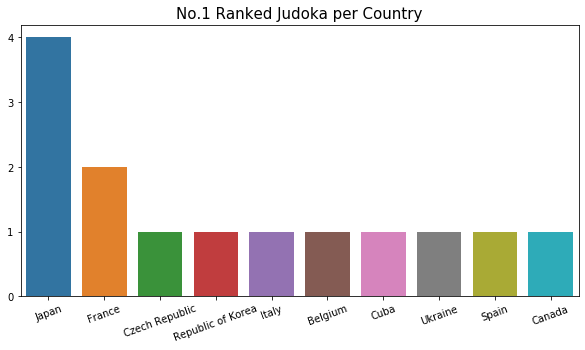

In [7]:
no1_judoka = df[df['place'] == 1]
no1_judoka_counts = pd.DataFrame(no1_judoka['country_name'].value_counts())

no1_judoka_counts.reset_index(inplace=True)
no1_judoka_counts = no1_judoka_counts.rename(columns = {'index':'Country', 'country_name':'Counts'})

plt.figure(figsize=(10,5))
sns.barplot(x=no1_judoka_counts['Country'], y=no1_judoka_counts['Counts'])
plt.xticks(rotation=20)
plt.yticks(np.arange(5))
plt.xlabel('')
plt.ylabel('')
plt.title('No.1 Ranked Judoka per Country',fontdict = {'fontsize' : 15})

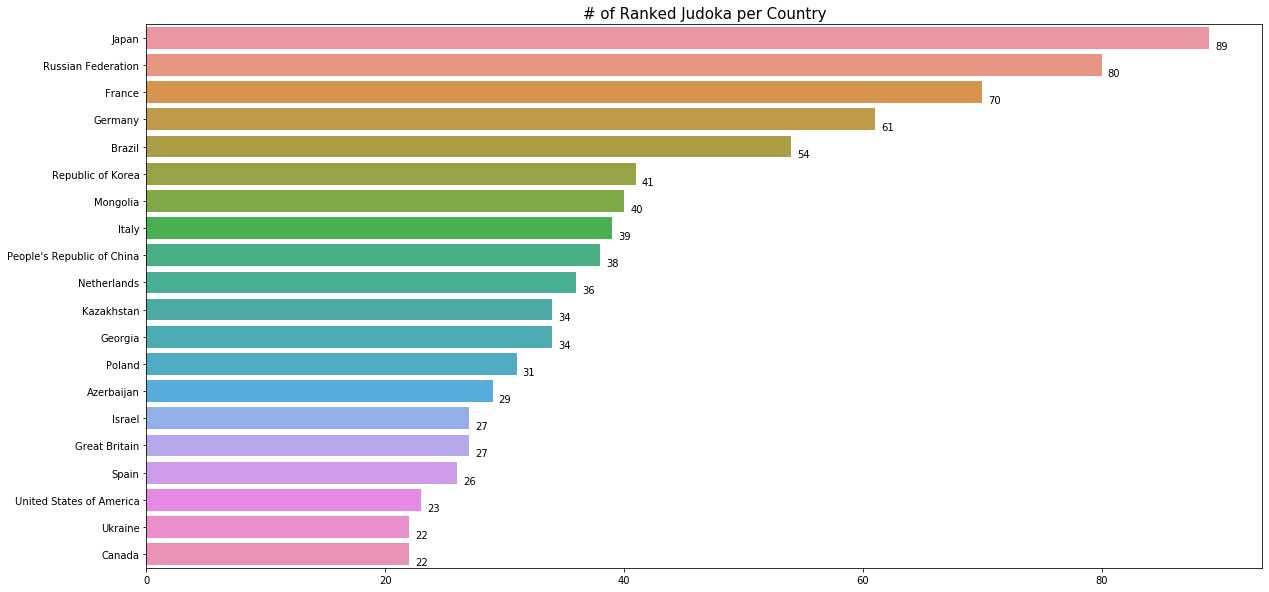

In [8]:
no100_judoka = pd.DataFrame(df['country_name'].value_counts())
no100_judoka_top20 = no100_judoka.head(20)
no100_judoka_top20

no100_judoka_top20.reset_index(inplace=True)
no100_judoka_top20 = no100_judoka_top20.rename(columns = {'index':'Country', 'country_name':'Counts'})
no100_judoka_top20

plt.figure(figsize=(20,10))
graph = sns.barplot(x=no100_judoka_top20['Counts'], y=no100_judoka_top20['Country'])

plt.xlabel('')
plt.ylabel('')
plt.title('# of Ranked Judoka per Country',fontdict = {'fontsize' : 15})

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
show_values_on_bars(graph, "h", 0.5)